# 와인 베스트 모델 찾기

In [1]:
import numpy as np
import tensorflow as tf

In [2]:
# 실행할 때마다 같은 결과를 출력하기 위한 seed 값 설정
seed = 2021
np.random.seed(seed)
tf.random.set_seed(seed)

### 데이터 전처리

In [3]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]
filename

Saving wine.csv to wine (1).csv


'wine.csv'

In [4]:
df = pd.read_csv(filename, header=None)
df.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df.iloc[:,:-1].values, df.iloc[:,-1].values, stratify=df.iloc[:,-1].values,
    random_state=seed
)
X_train.shape, X_test.shape

((4872, 12), (1625, 12))

### 모델 정의/설정

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [7]:
model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                390       
_________________________________________________________________
dense_1 (Dense)              (None, 12)                372       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### 모델 저장 관련 환경 설정

In [9]:
import os
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [10]:
!ls -l

total 720
drwxr-xr-x 2 root root   4096 Feb 10 01:31  model
drwxr-xr-x 1 root root   4096 Feb  4 15:26  sample_data
-rw-r--r-- 1 root root 361279 Feb 10 01:31 'wine (1).csv'
-rw-r--r-- 1 root root 361279 Feb 10 00:44  wine.csv


In [11]:
# 모델 저장 조건 설정
modelpath = MODEL_DIR + "best{epoch:03d}-{val_loss:.4f}.hdf5"

In [12]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)

### 모델 학습 및 저장

In [13]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=200,
          verbose=0, callbacks=[checkpointer])


Epoch 00001: val_loss improved from inf to 0.41822, saving model to ./model/best001-0.4182.hdf5

Epoch 00002: val_loss improved from 0.41822 to 0.28623, saving model to ./model/best002-0.2862.hdf5

Epoch 00003: val_loss improved from 0.28623 to 0.24628, saving model to ./model/best003-0.2463.hdf5

Epoch 00004: val_loss improved from 0.24628 to 0.22050, saving model to ./model/best004-0.2205.hdf5

Epoch 00005: val_loss improved from 0.22050 to 0.20001, saving model to ./model/best005-0.2000.hdf5

Epoch 00006: val_loss improved from 0.20001 to 0.19209, saving model to ./model/best006-0.1921.hdf5

Epoch 00007: val_loss improved from 0.19209 to 0.18488, saving model to ./model/best007-0.1849.hdf5

Epoch 00008: val_loss improved from 0.18488 to 0.18360, saving model to ./model/best008-0.1836.hdf5

Epoch 00009: val_loss improved from 0.18360 to 0.17670, saving model to ./model/best009-0.1767.hdf5

Epoch 00010: val_loss improved from 0.17670 to 0.17541, saving model to ./model/best010-0.1754

### 잘못된 평가

In [14]:
acc = model.evaluate(X_test, y_test)
print(f'Accuracy: {acc[1]:.4f}')

51/51 [==============================] - 0s 886us/step - loss: 0.0712 - accuracy: 0.9791
Accuracy: 0.9791


### 베스트 모델로 평가

In [15]:
from tensorflow.keras.models import load_model

best_model = load_model('./model/best181-0.0530.hdf5')
acc = best_model.evaluate(X_test, y_test)
print(f'Accuracy: {acc[1]:.4f}')

51/51 [==============================] - 0s 791us/step - loss: 0.0747 - accuracy: 0.9778
Accuracy: 0.9778


### 시각화

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
type(history.history)

dict

In [18]:
y_vloss=history.history['val_loss']
y_acc=history.history['accuracy']
y_vacc=history.history['val_accuracy']
y_loss=history.history['loss']

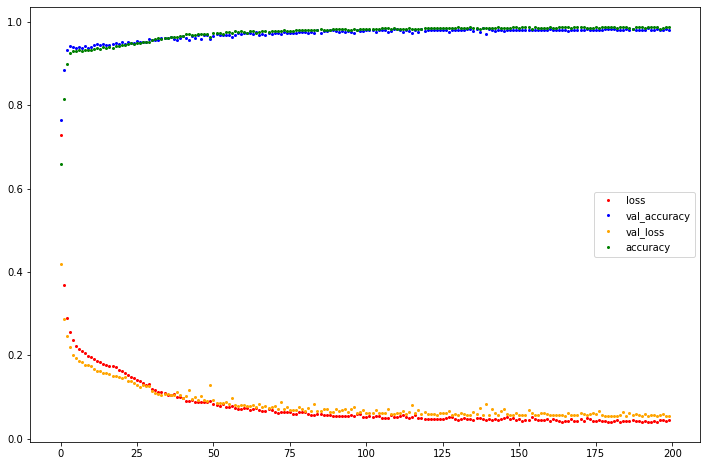

In [19]:
x_len = np.arange(len(y_acc))
plt.figure(figsize=(12,8))
plt.plot(x_len, y_loss, "o", c="red", markersize=2, label='loss')
plt.plot(x_len, y_vacc, "o", c="blue", markersize=2, label='val_accuracy')
plt.plot(x_len, y_vloss, "o", c="orange", markersize=2, label='val_loss')
plt.plot(x_len, y_acc, "o", c="green", markersize=2, label='accuracy')
plt.legend()
plt.show()